# Data Example

In [1]:
import pandas as pd

df = pd.read_csv("../data/synthetic_dataset.csv")
df.head()

,candidate_job_match,candidate_name,job_title,tags,tech_consultant_comment,project_rating,status,final_status,cv,resume_text,linkedin_profile,job_description,resume_length,job_desc_length,resume_word_count,job_desc_word_count
0,🟪 Smith: Palabra: Senior Deep Learning Engineer,John Smith,Palabra: Senior Deep Learning Engineer,"ML,ML: ASR / TTS / STT / Audio,Founder,Python","John: 4/5 go ahead and show, extensive voice w...",4/5,GG. Candidate declined,I.6. Contacted,NaN,NaN,https://www.linkedin.com/in/john-smith-38148b12a/,About Palabra.ai...,NaN,3039,NaN,454
1,🔲 Johnson: Palabra: Senior DE/MLops,Michael Johnson,Palabra: Senior DE/MLops,"ML,ML: Computer Vision,Backend",John: don't see Go or similar languages experi...,NaN,I.4a. Resume evaluated (not recommended),I.4a. Resume evaluated (not recommended),NaN,NaN,https://www.linkedin.com/in/michael-johnson/,Senior MLOps Engineer position description...,2500.0,2800,420.0,460
2,🟪 Williams: Palabra: Senior DE/MLops,Sarah Williams,Palabra: Senior DE/MLops,"DE,ML,Python,DevOps",John: 3/4 on basic requirements all good excep...,3/4,GG. Position closed,I.6. Contacted,NaN,NaN,https://www.linkedin.com/in/sarah-williams/,MLOps Engineer role details...,2200.0,2600,380.0,430
3,🟪 Brown: Palabra: Senior Deep Learning Engineer,Robert Brown,Palabra: Senior Deep Learning Engineer,"ML,ML: NLP,Data Scientist,Fintech,PhD","John: 4/5 though profile is NLP, everything el...",4,GG. Candidate declined,I.7. In contact,NaN,NaN,https://www.linkedin.com/in/robert-brown/,Deep Learning Engineer position description...,2800.0,2900,470.0,480
4,🔲 Davis: XTX: Software Engineer,Emma Davis,XTX: Software Engineer,"C++,Python","John: 3 experience not great, no C++ experience",3,I.4a. Resume evaluated (not recommended),I.4a. Resume evaluated (not recommended),NaN,NaN,https://www.linkedin.com/in/emma-davis/,Software Engineer role at XTX...,1800.0,2100,300.0,350


# Descriptive Analysis

In [2]:
import matplotlib.pyplot as plt
plt.style.use('style.mplstyle')

In [17]:
import pandas as pd
import numpy as np

english_labels = [
    "candidate_job_match","candidate_name","job_title","tags",
    "tech_consultant_comment","project_rating","status","final_status",
    "cv","resume_text","linkedin_profile","job_description",
]

df = pd.read_csv("../data/dataset.csv", names=english_labels, skiprows=1)


## 1. General Dataset Information

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   candidate_job_match      1249 non-null   object
 1   candidate_name           1249 non-null   object
 2   job_title                1249 non-null   object
 3   tags                     1214 non-null   object
 4   tech_consultant_comment  1062 non-null   object
 5   project_rating           730 non-null    object
 6   status                   1249 non-null   object
 7   final_status             1248 non-null   object
 8   cv                       1053 non-null   object
 9   resume_text              1041 non-null   object
 10  linkedin_profile         932 non-null    object
 11  job_description          1249 non-null   object
dtypes: object(12)
memory usage: 117.2+ KB


## 2. Missing Values Analysis


Missing Values:
candidate_job_match          0
candidate_name               0
job_title                    0
tags                        35
tech_consultant_comment    187
project_rating             519
status                       0
final_status                 1
cv                         196
resume_text                208
linkedin_profile           317
job_description              0
dtype: int64


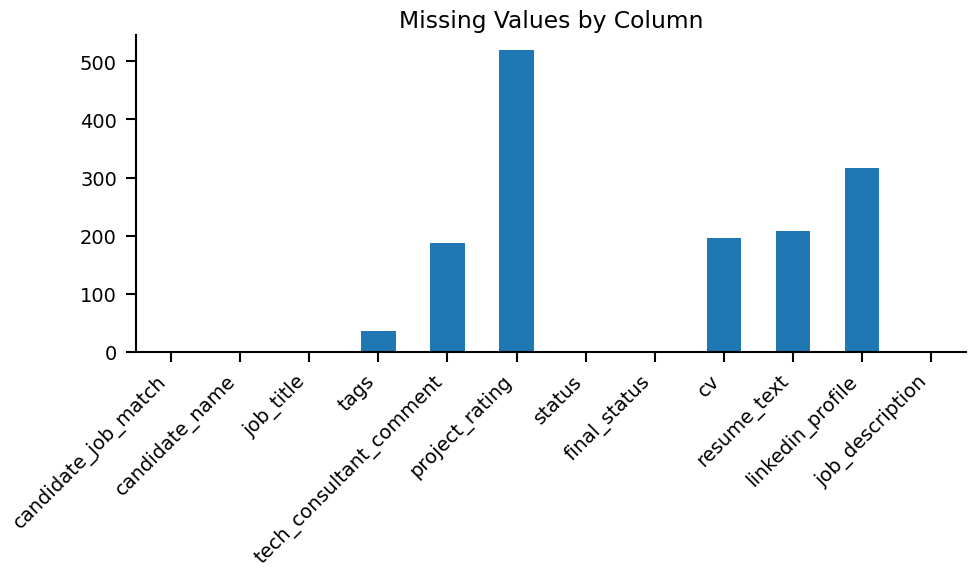

In [5]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))

missing_values.plot(kind='bar')

plt.title("Missing Values by Column")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("figures/missing_values.png", dpi=300, bbox_inches="tight")
plt.show()

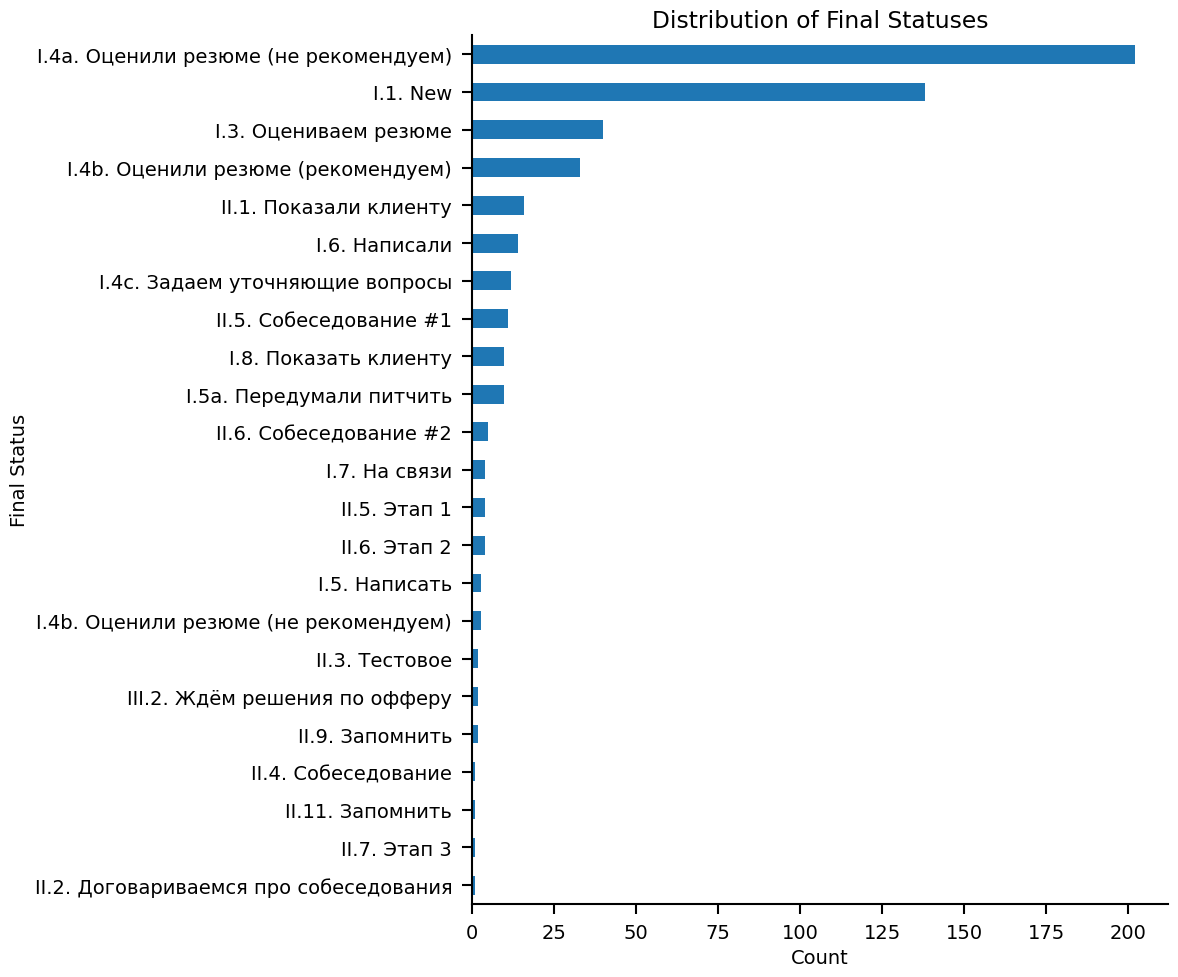

In [6]:
plt.figure(figsize=(12, 10))

df[df.project_rating.isna()].final_status.value_counts().sort_values(ascending=True).plot(
    kind="barh", 
    title="Distribution of Final Statuses"
)

plt.xlabel("Count")
plt.ylabel("Final Status")
plt.tight_layout()
plt.show()

In [7]:
negative_status_list = [
    "F. Отказали мы",
    "I.4a. Оценили резюме (не рекомендуем)",
    "F. Отказал клиент",
    "I.5a. Передумали питчить",
]
df["is_negative_status"] = df.final_status.isin(negative_status_list)


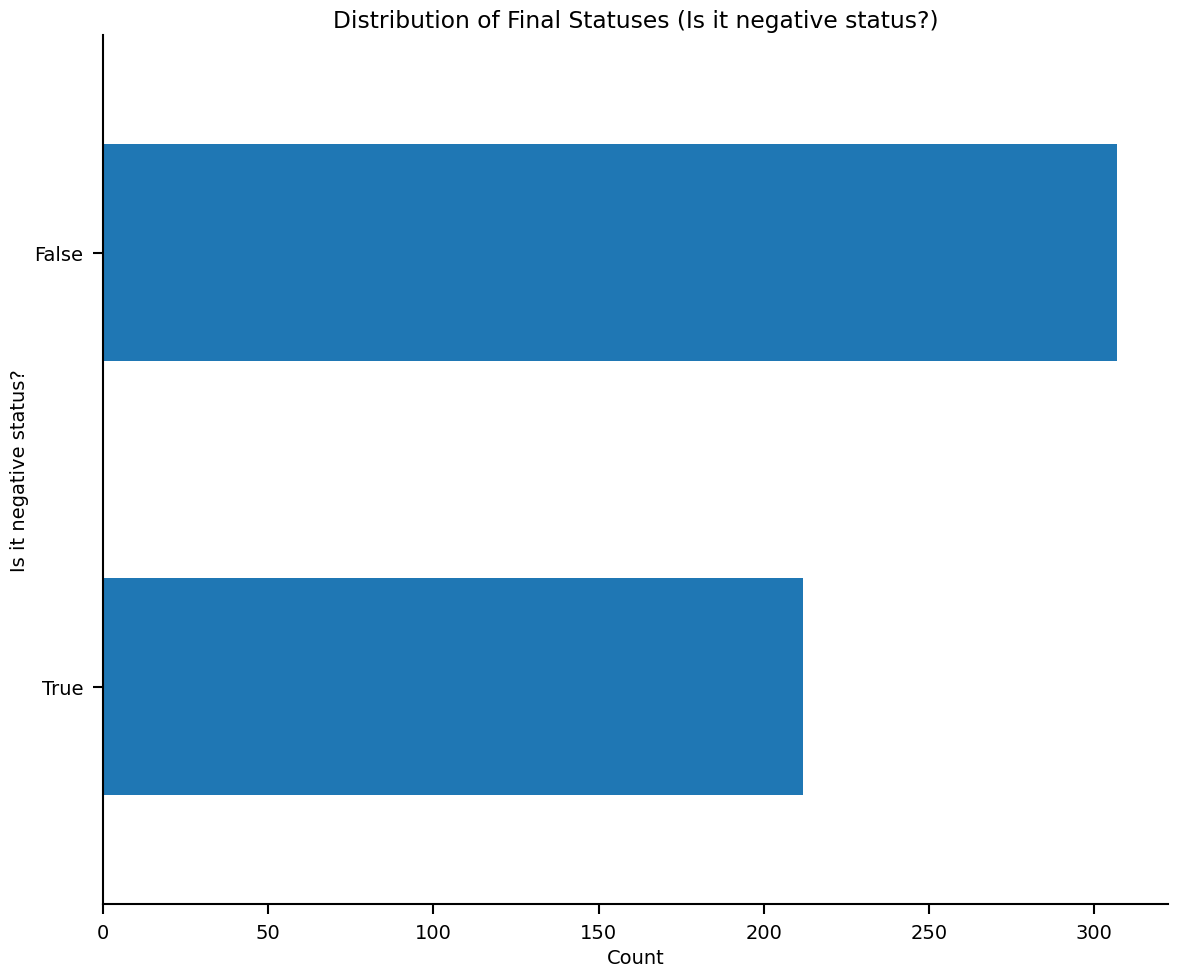

In [8]:
plt.figure(figsize=(12, 10))
plt.tight_layout()

df[df.project_rating.isna()].is_negative_status.value_counts().sort_values(ascending=True).plot(
    kind="barh", 
    title="Distribution of Final Statuses (Is it negative status?)"
)

plt.xlabel("Count")
plt.ylabel("Is it negative status?")
plt.tight_layout()

plt.savefig("figures/negative_statuses.png", dpi=300, bbox_inches="tight")
plt.show()


In [9]:
df.loc[(df.project_rating.isna() & df.is_negative_status), "project_rating"] = "0"

In [10]:
df_filtered = df.dropna()

In [16]:
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 1248
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   candidate_job_match      560 non-null    object
 1   candidate_name           560 non-null    object
 2   job_title                560 non-null    object
 3   tags                     560 non-null    object
 4   tech_consultant_comment  560 non-null    object
 5   project_rating           560 non-null    object
 6   status                   560 non-null    object
 7   final_status             560 non-null    object
 8   cv                       560 non-null    object
 9   resume_text              560 non-null    object
 10  linkedin_profile         560 non-null    object
 11  job_description          560 non-null    object
 12  is_negative_status       560 non-null    bool  
dtypes: bool(1), object(12)
memory usage: 57.4+ KB


## 3. Rating Analysis

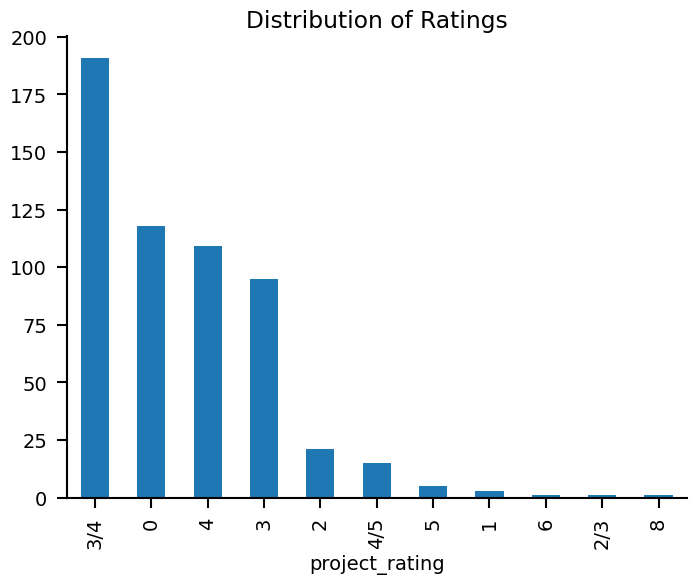

In [11]:
df_filtered.project_rating.value_counts().plot(
    kind="bar", title="Distribution of Ratings"
);

plt.savefig("figures/rating_distribution_not_filtered.png", dpi=300, bbox_inches="tight")


In [12]:
df_filtered.loc[:, "project_rating"] = df_filtered.project_rating.apply(lambda x: int(x) if "/" not in str(x) else np.mean(list(map(int, x.split("/")))))


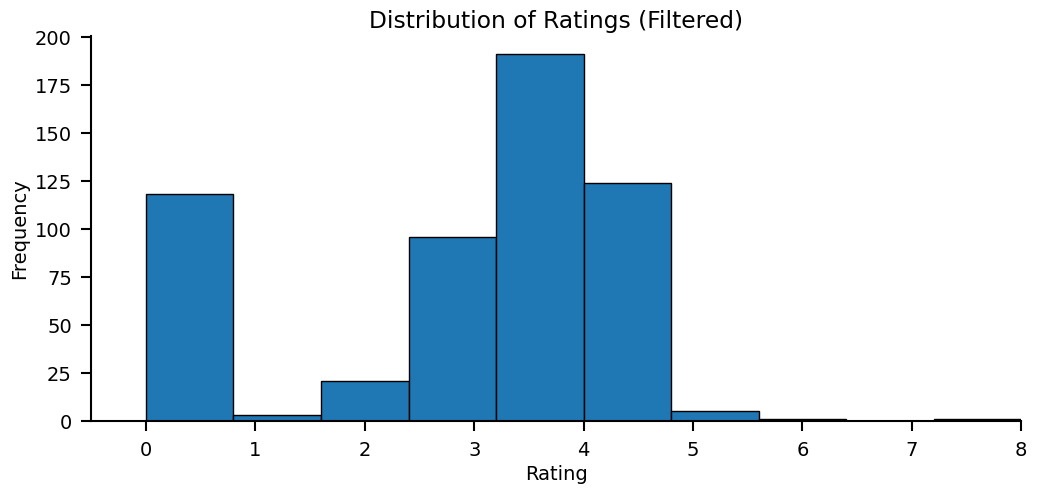

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
df_filtered.project_rating.hist(grid=False, ax=ax, edgecolor="black")
ax.set_title("Distribution of Ratings (Filtered)")
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_xlim(-0.5, 8)

plt.savefig("figures/rating_distribution_filtered.png", dpi=300, bbox_inches="tight")

<Figure size 1500x700 with 0 Axes>

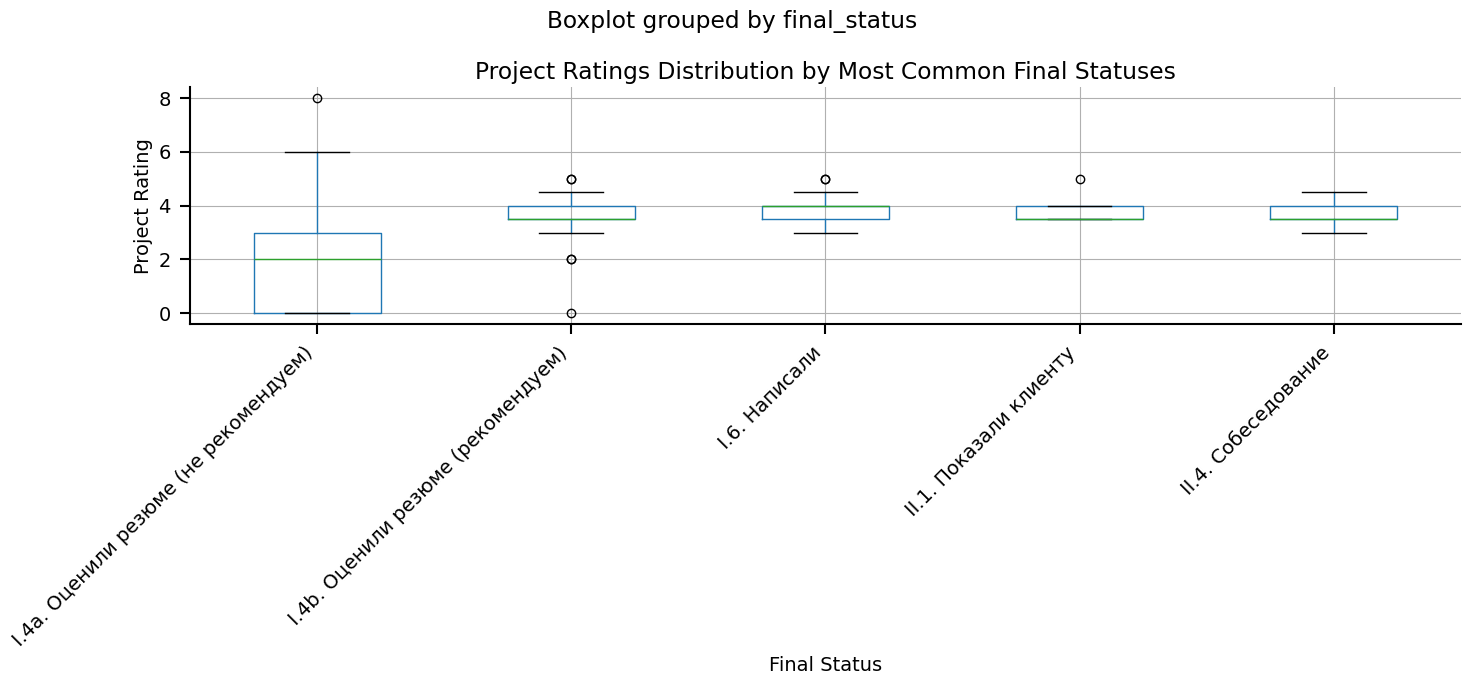


Statistics for most common final statuses:

Count by status:
final_status
I.4a. Оценили резюме (не рекомендуем)    227
I.4b. Оценили резюме (рекомендуем)       120
I.6. Написали                             90
II.1. Показали клиенту                    34
II.4. Собеседование                       26
Name: count, dtype: int64

Mean project ratings:
final_status
I.6. Написали                            3.822222
II.1. Показали клиенту                   3.735294
II.4. Собеседование                      3.653846
I.4b. Оценили резюме (рекомендуем)       3.629167
I.4a. Оценили резюме (не рекомендуем)    1.491189
Name: project_rating, dtype: object


In [14]:
plt.figure(figsize=(15, 7))

top_statuses = df_filtered['final_status'].value_counts().head(5).index
df_top_statuses = df_filtered[df_filtered.final_status.isin(top_statuses)]
df_top_statuses.boxplot(column='project_rating', by='final_status', figsize=(15, 7))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Final Status')
plt.ylabel('Project Rating')
plt.title('Project Ratings Distribution by Most Common Final Statuses')
plt.tight_layout()

plt.savefig("figures/rating_distribution_by_status.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics for the most common statuses
print("\nStatistics for most common final statuses:")
print("\nCount by status:")
print(df_top_statuses['final_status'].value_counts())
print("\nMean project ratings:")
print(df_top_statuses.groupby('final_status')['project_rating'].mean().sort_values(ascending=False))

# 4. Text Fields context distribution

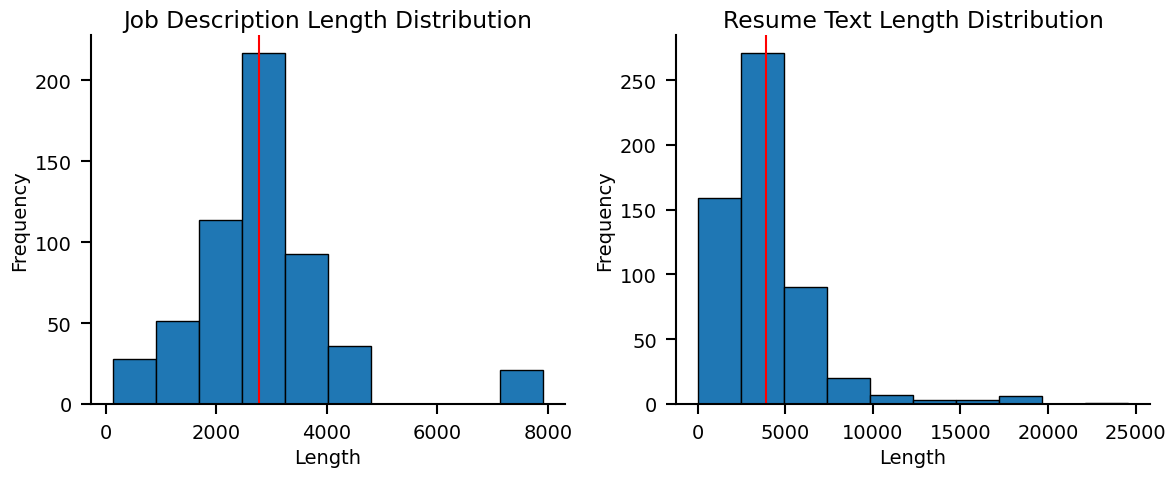

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df_filtered.job_description.str.len().hist(grid=False, ax=ax[0], edgecolor="black")
df_filtered.resume_text.str.len().hist(grid=False, ax=ax[1], edgecolor="black")

ax[0].set_title("Job Description Length Distribution")
ax[1].set_title("Resume Text Length Distribution")

ax[0].axvline(df_filtered.job_description.str.len().mean(), color="red")
ax[1].axvline(df_filtered.resume_text.str.len().mean(), color="red")

ax[0].set_xlabel("Length")
ax[1].set_xlabel("Length")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

plt.tight_layout()

plt.savefig("figures/text_length_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

